<a href="https://colab.research.google.com/github/savinthie/Final_Year_Project_IDP_2024-2025/blob/main/Model_7_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, ReLU, Concatenate, MaxPooling1D,Dropout
from tensorflow.keras.optimizers import Adam
import joblib
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/FYP 2024 25/USDataset.csv', header=1)
df = df.fillna(0)

Mounted at /content/drive


In [3]:
# Data Preprocessing
df.columns = [col.lower().replace(' ', '').replace('.', '') for col in df.columns]
cols_to_keep = ['stateabv', 'county', 'family', 'housing', 'food', 'transportation',
                'healthcare', 'othernecessities', 'childcare', 'taxes', 'total',
                'median_family_income', 'num_counties_in_st']
df1 = df[cols_to_keep].copy()

df1['median_family_income'] = df1['median_family_income'].replace(',', '', regex=True).astype(float)

In [4]:
# Feature Engineering
df1['n_parents'] = df1['family'].str.slice(0, 1).astype(int)
df1['n_children'] = df1['family'].str.slice(2, 3).astype(int)
df1['n_members'] = df1['n_parents'] + df1['n_children']
df1['financial_stability'] = df1['median_family_income'] / df1['total']
df1["per_member_cost"] = df1["total"] / df1["n_members"]
df1["child_expense_cost"] = df1["per_member_cost"]*df1["n_children"]
df1["parent_expense_cost"] = df1["per_member_cost"]*df1["n_parents"]
df1["other_expense_cost"] = df1["total"] - (df1["child_expense_cost"]+df1["parent_expense_cost"])

In [5]:
# Splitting the data
X = df1[['total', 'median_family_income', 'num_counties_in_st', 'n_children', 'n_parents', 'n_members']+['per_member_cost','child_expense_cost','parent_expense_cost','other_expense_cost']].values
y_expenses = df1[['housing', 'food', 'transportation', 'healthcare', 'othernecessities', 'childcare', 'taxes']].values

target_col_list = ['housing', 'food', 'transportation', 'healthcare', 'othernecessities', 'childcare', 'taxes']

# Scaling
scaler_X = StandardScaler()

# Load the X scaler
# scaler_X = joblib.load('scaler_X.pkl')

X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()

# Load the y scaler
# scaler_y = joblib.load('scaler_y.pkl')
y_exp_scaled = scaler_y.fit_transform(y_expenses)



# Save the X scaler
joblib.dump(scaler_X, 'scaler_X.pkl')

# Save the y scaler
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

In [6]:
# Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=100)

Fold 1/5
Model Results for Housing (Fold 1):
Train Data: {'MAE': 0.06120842940726983, 'MSE': 0.008441807264970508, 'RMSE': 0.0918793081437301, 'R-Squared': 0.9891037249288869, 'MAPE': 50.74974106823075}
Validation Data: {'MAE': 0.3353068120197935, 'MSE': 0.26311915440868117, 'RMSE': 0.5129514152516602, 'R-Squared': 0.8540471173257027, 'MAPE': 103.29957338997806}
Test Data: {'MAE': 0.32444744975036993, 'MSE': 0.25081575083361685, 'RMSE': 0.500815086467667, 'R-Squared': 0.8584816880031235, 'MAPE': 124.61879962357007}

Model Results for Food (Fold 1):
Train Data: {'MAE': 0.03683367332663418, 'MSE': 0.003412793090535704, 'RMSE': 0.058419115797277384, 'R-Squared': 0.996447640459495, 'MAPE': 18.297956719216092}
Validation Data: {'MAE': 0.19803053789570202, 'MSE': 0.08286740832272012, 'RMSE': 0.2878669976268904, 'R-Squared': 0.9284645202631608, 'MAPE': 100.31136349771602}
Test Data: {'MAE': 0.19423635612671378, 'MSE': 0.07771428403564237, 'RMSE': 0.27877281796409487, 'R-Squared': 0.9310095624

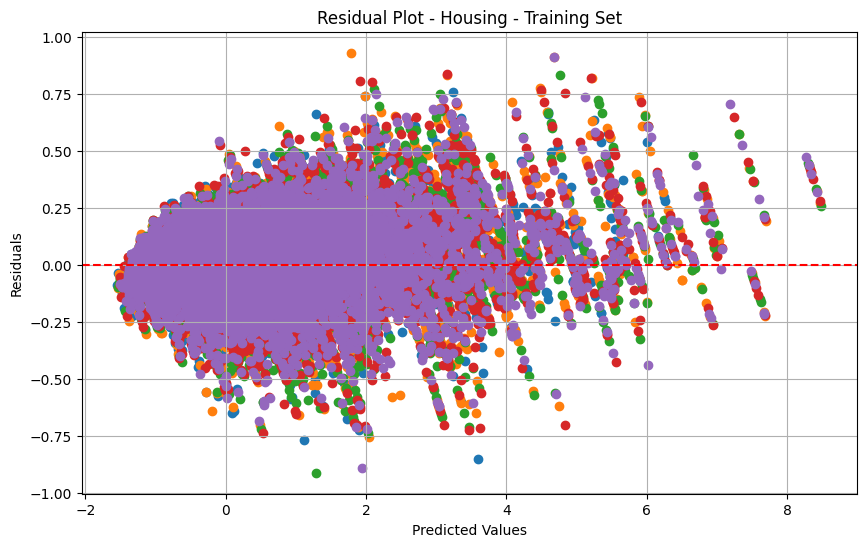

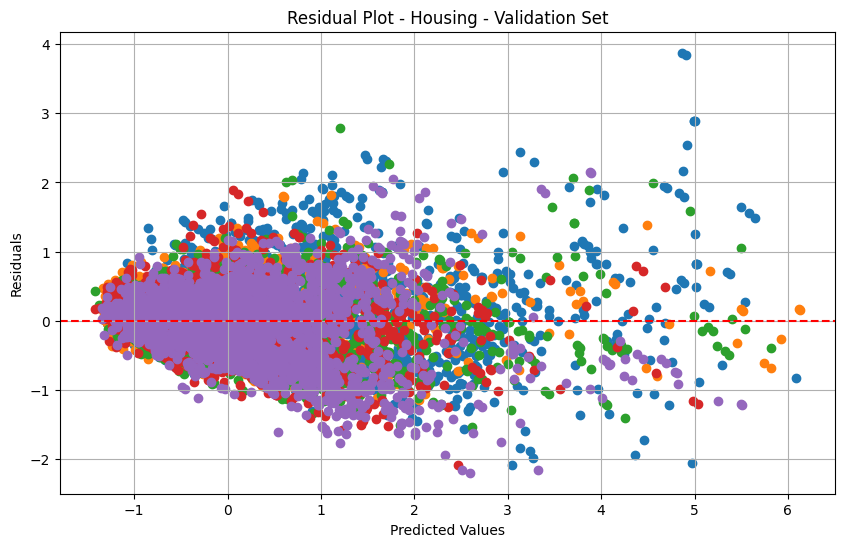

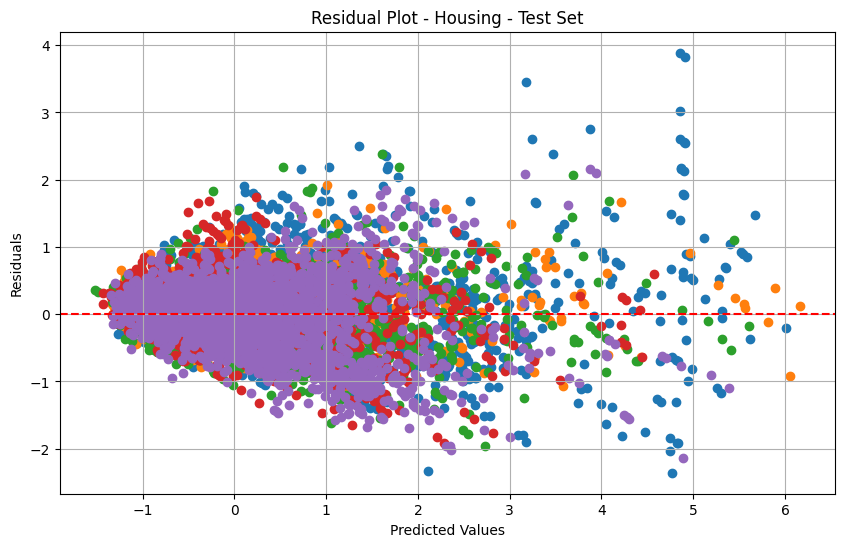

Results for Food:
Average Train Metrics: {'MAE': 0.041086743044343774, 'MSE': 0.004027132007600288, 'RMSE': 0.06339111773467139, 'R-Squared': 0.9959771475849891, 'MAPE': 20.33573917467122}
Average Validation Metrics: {'MAE': 0.16425501176133253, 'MSE': 0.05494189844925015, 'RMSE': 0.22914141908339553, 'R-Squared': 0.9453798255442448, 'MAPE': 84.94816371183892}
Average Test Metrics: {'MAE': 0.1654686613961476, 'MSE': 0.05732745947058314, 'RMSE': 0.23576080566853017, 'R-Squared': 0.9427477497078363, 'MAPE': 100.1207709137604}



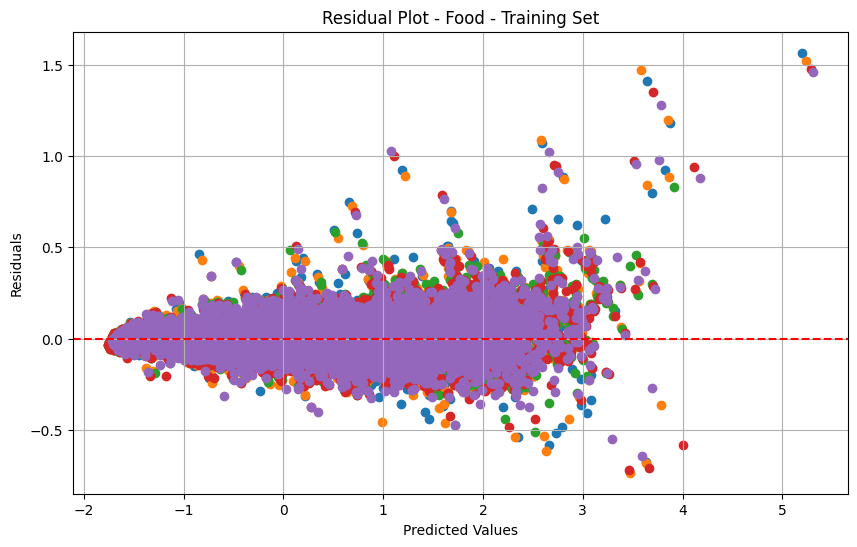

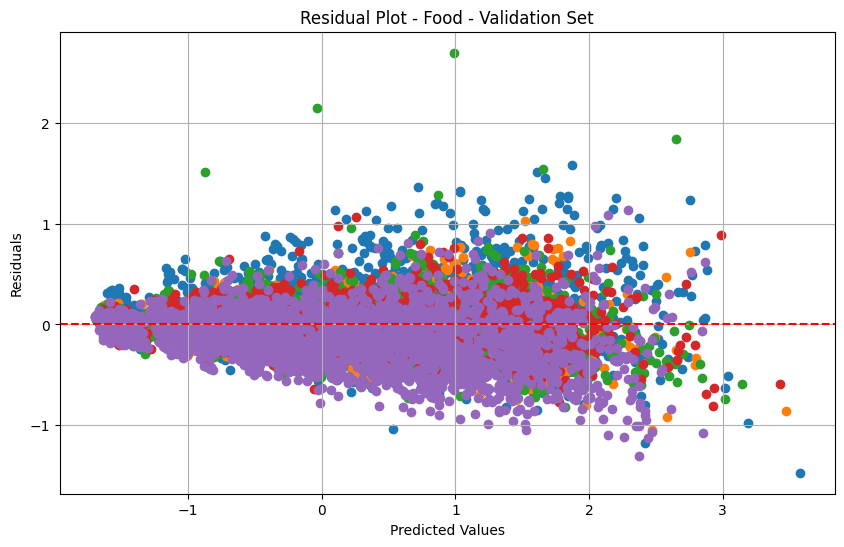

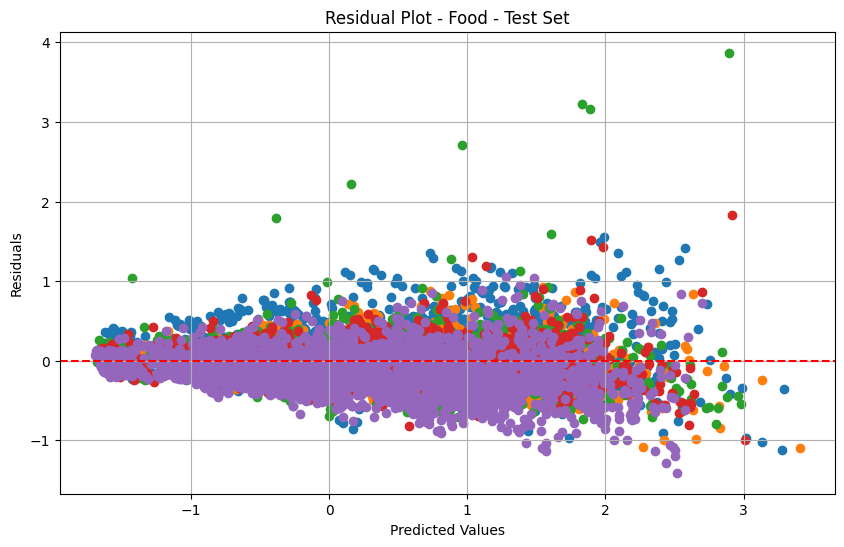

Results for Transportation:
Average Train Metrics: {'MAE': 0.1311808713213729, 'MSE': 0.03363013253414093, 'RMSE': 0.18333697480411223, 'R-Squared': 0.9663603557933168, 'MAPE': 78.59849478096115}
Average Validation Metrics: {'MAE': 0.5244702849902118, 'MSE': 0.5113360419046913, 'RMSE': 0.7112560616685307, 'R-Squared': 0.4878446841616393, 'MAPE': 311.7393681752501}
Average Test Metrics: {'MAE': 0.5127614224303204, 'MSE': 0.48161786631448517, 'RMSE': 0.6914149100379775, 'R-Squared': 0.5169085433715028, 'MAPE': 268.5777372336012}



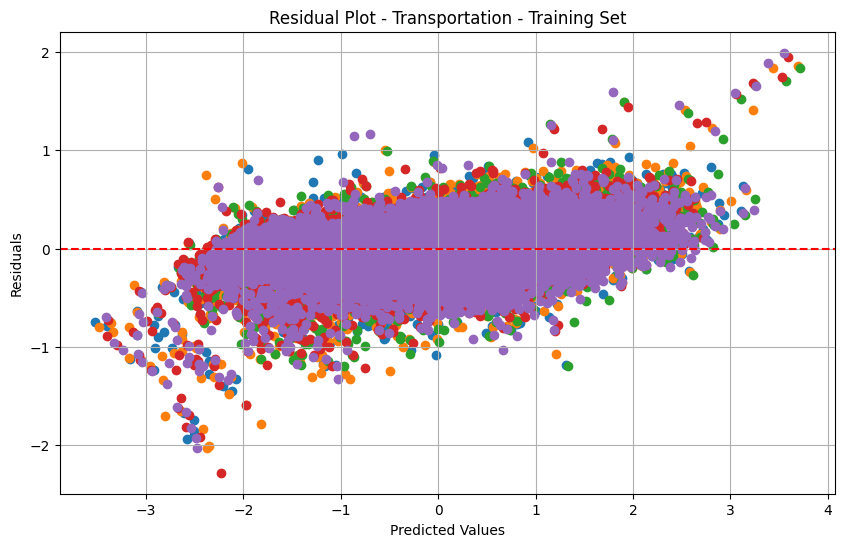

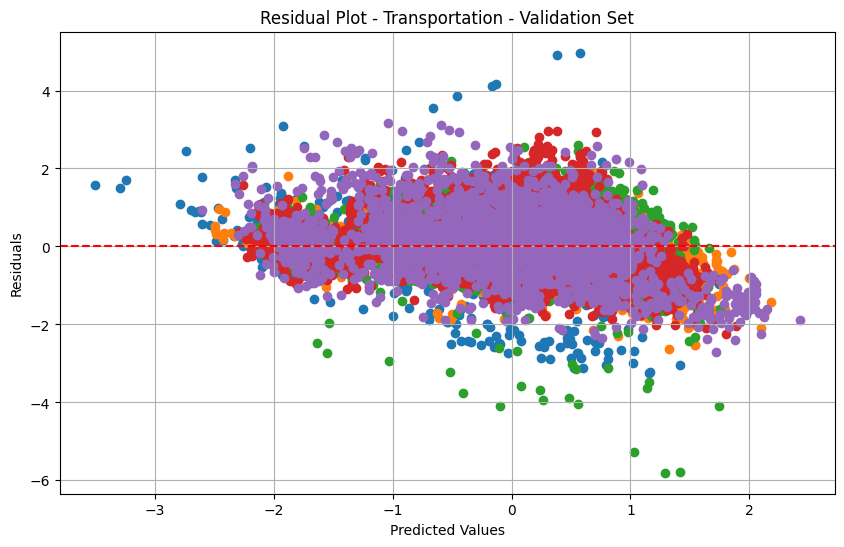

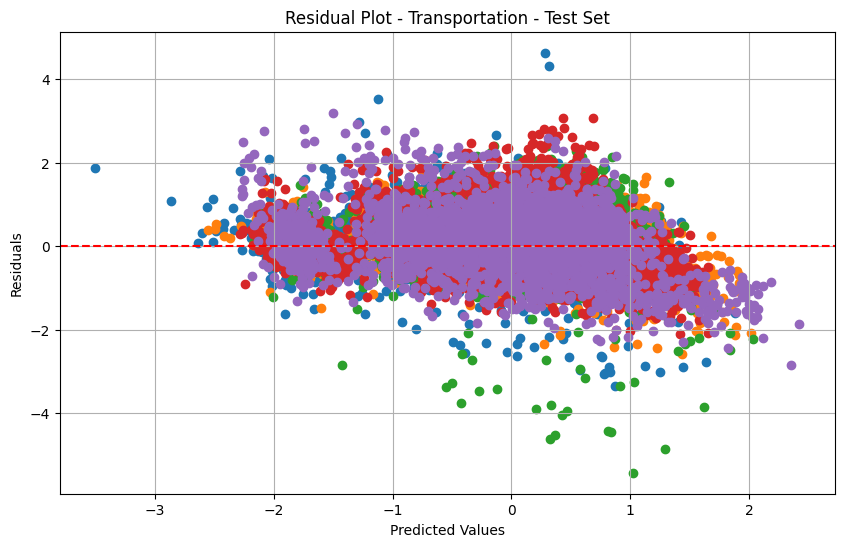

Results for Healthcare:
Average Train Metrics: {'MAE': 0.05934030889679602, 'MSE': 0.00860935076153767, 'RMSE': 0.09276270329287058, 'R-Squared': 0.9913838075850394, 'MAPE': 51.14763990492342}
Average Validation Metrics: {'MAE': 0.39629132569348124, 'MSE': 0.3371693174810053, 'RMSE': 0.5731534639405644, 'R-Squared': 0.6669700472976834, 'MAPE': 329.1473008458414}
Average Test Metrics: {'MAE': 0.39364897101799706, 'MSE': 0.3339079161767159, 'RMSE': 0.5691270837280553, 'R-Squared': 0.6695555734550497, 'MAPE': 319.6653374806818}



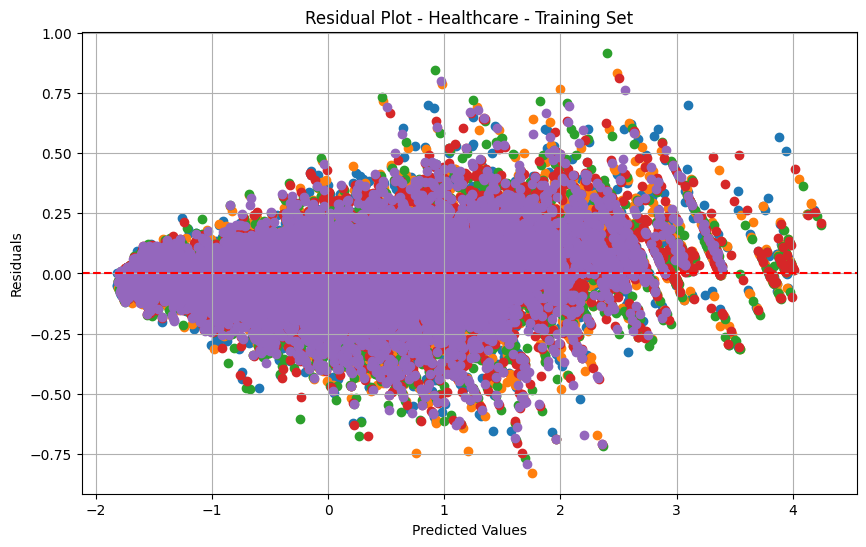

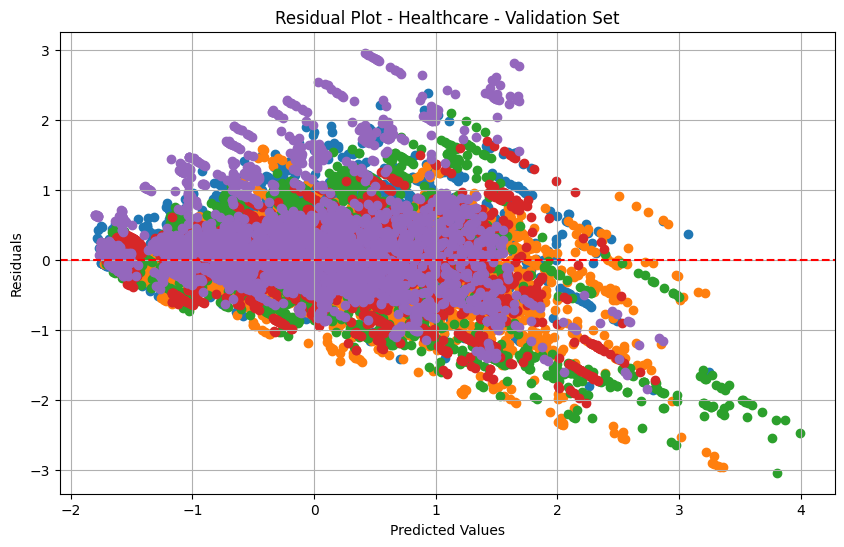

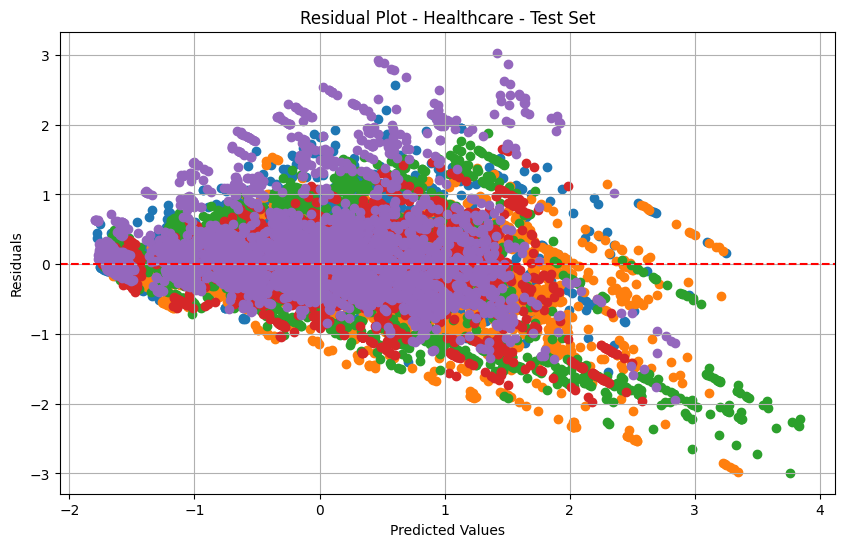

Results for Othernecessities:
Average Train Metrics: {'MAE': 0.047408436751111296, 'MSE': 0.004770527503230858, 'RMSE': 0.06901352577879527, 'R-Squared': 0.9952269525324807, 'MAPE': 28.356548428791974}
Average Validation Metrics: {'MAE': 0.20110582529123158, 'MSE': 0.07964088334518102, 'RMSE': 0.279133420278098, 'R-Squared': 0.9183434085310719, 'MAPE': 110.7596810057994}
Average Test Metrics: {'MAE': 0.19847317466045653, 'MSE': 0.07734412386994478, 'RMSE': 0.27533335432541667, 'R-Squared': 0.9190622728111608, 'MAPE': 105.31859025446838}



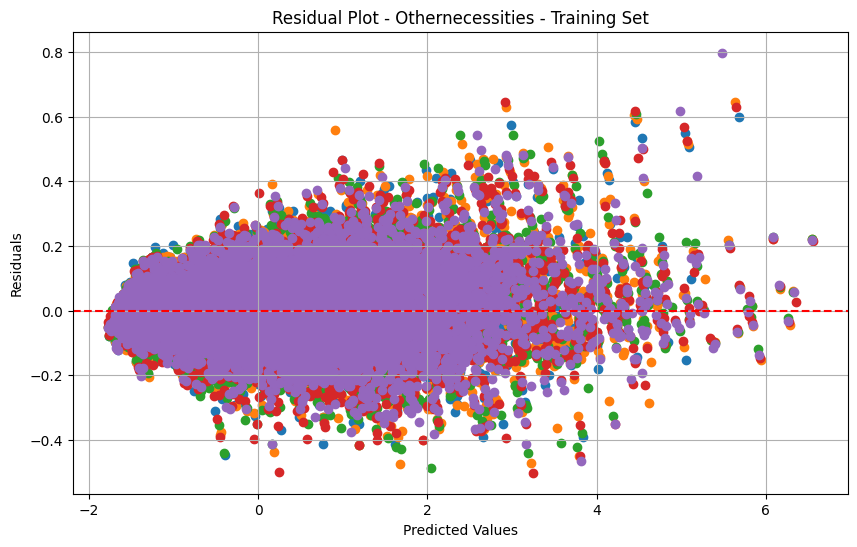

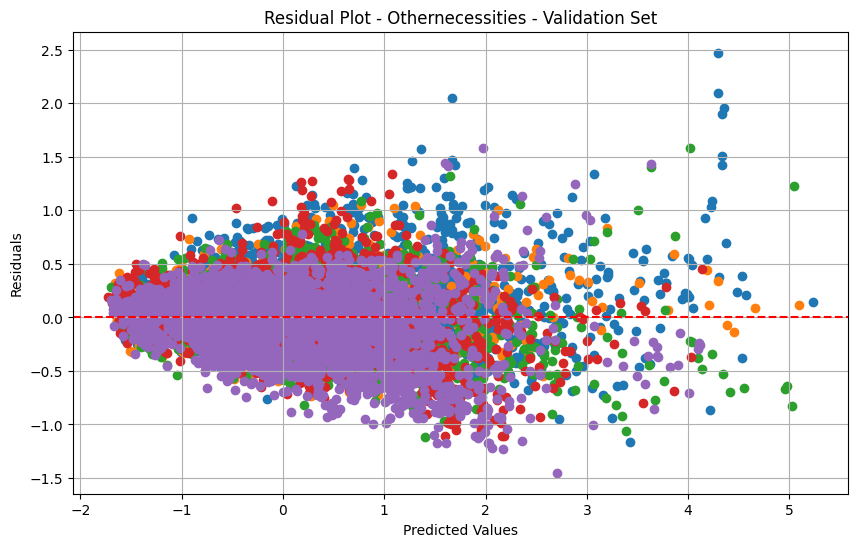

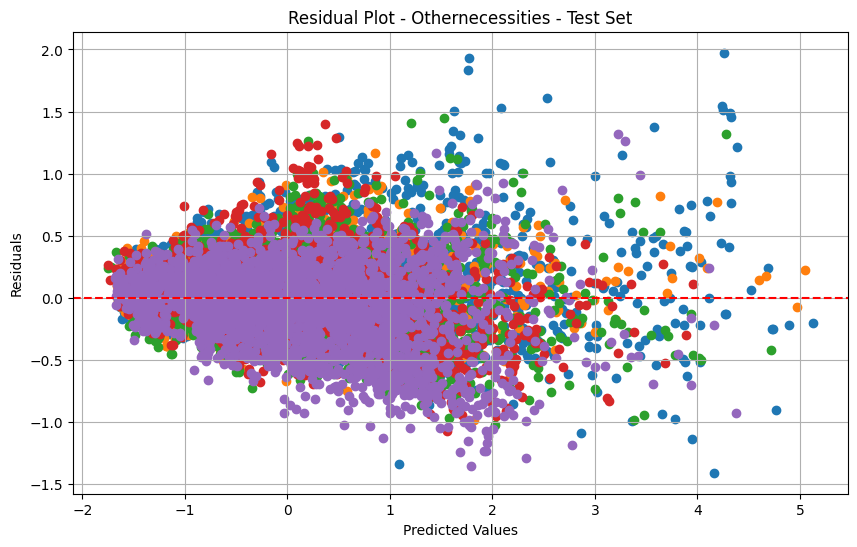

Results for Childcare:
Average Train Metrics: {'MAE': 0.040053427349588965, 'MSE': 0.004687275381416859, 'RMSE': 0.06842047374672254, 'R-Squared': 0.9953091842064101, 'MAPE': 27.48624465471292}
Average Validation Metrics: {'MAE': 0.22396464676339162, 'MSE': 0.11386086384497993, 'RMSE': 0.333663660263534, 'R-Squared': 0.8875148661229881, 'MAPE': 164.04877179089686}
Average Test Metrics: {'MAE': 0.22139114861742573, 'MSE': 0.11097349031631545, 'RMSE': 0.32983485315711836, 'R-Squared': 0.888575540156376, 'MAPE': 144.11280028899213}



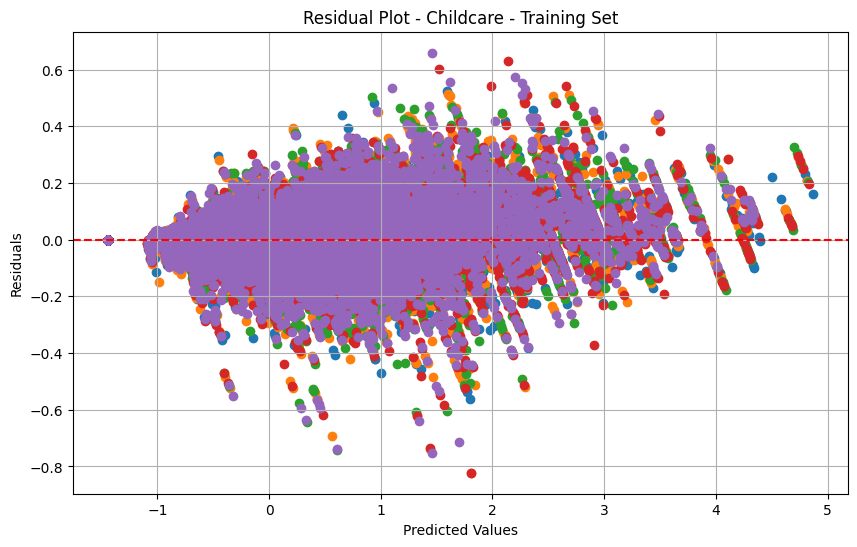

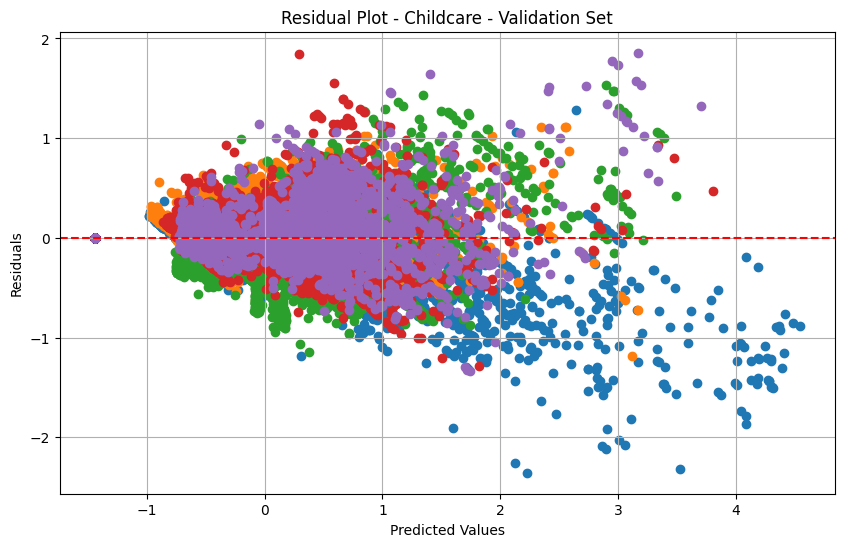

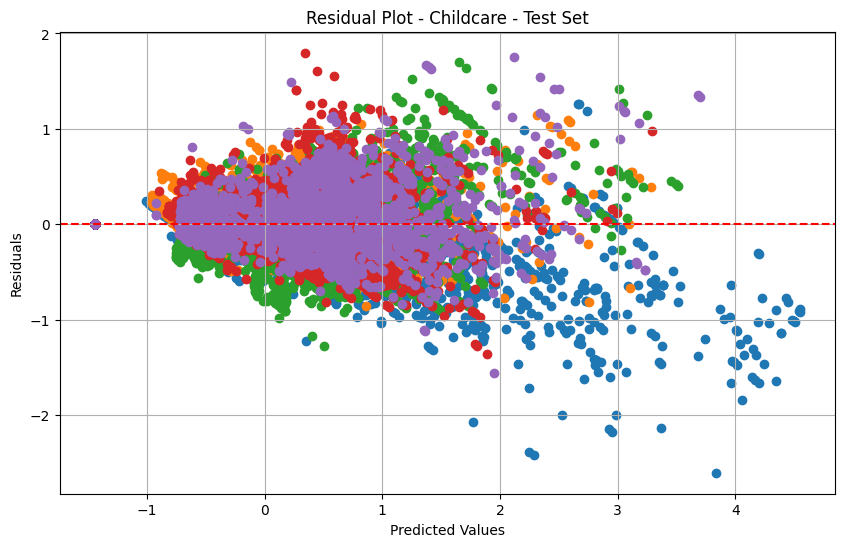

Results for Taxes:
Average Train Metrics: {'MAE': 0.017960455844625106, 'MSE': 0.0015766739724410478, 'RMSE': 0.03944496175682691, 'R-Squared': 0.9984356660341216, 'MAPE': 11.88762573794022}
Average Validation Metrics: {'MAE': 0.18657014482849849, 'MSE': 0.08280368759202483, 'RMSE': 0.2666653183966331, 'R-Squared': 0.9135671310798351, 'MAPE': 120.67564815802857}
Average Test Metrics: {'MAE': 0.18475478739504173, 'MSE': 0.08205304819916541, 'RMSE': 0.26443671552354187, 'R-Squared': 0.9128876773226733, 'MAPE': 137.94527186508316}



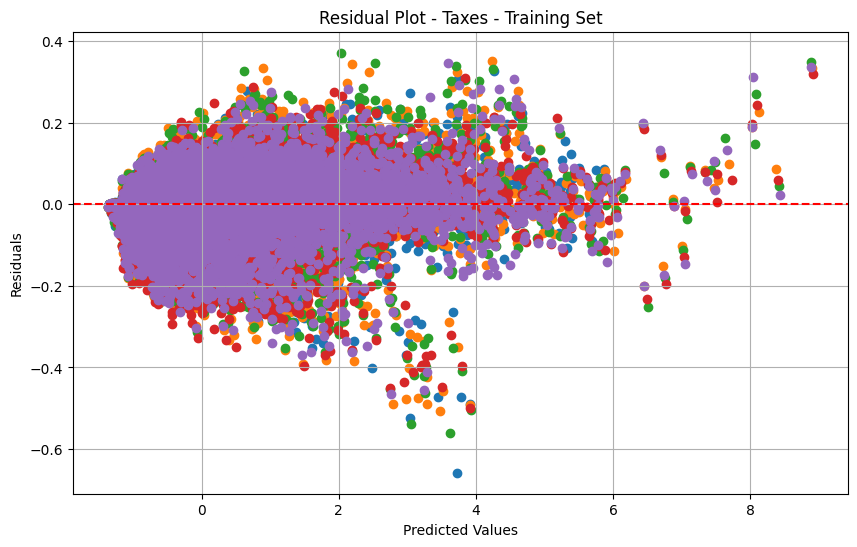

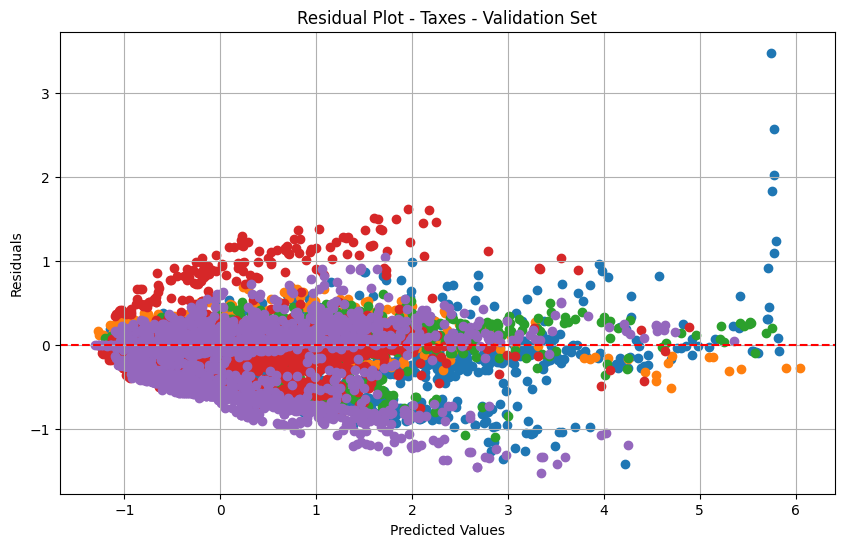

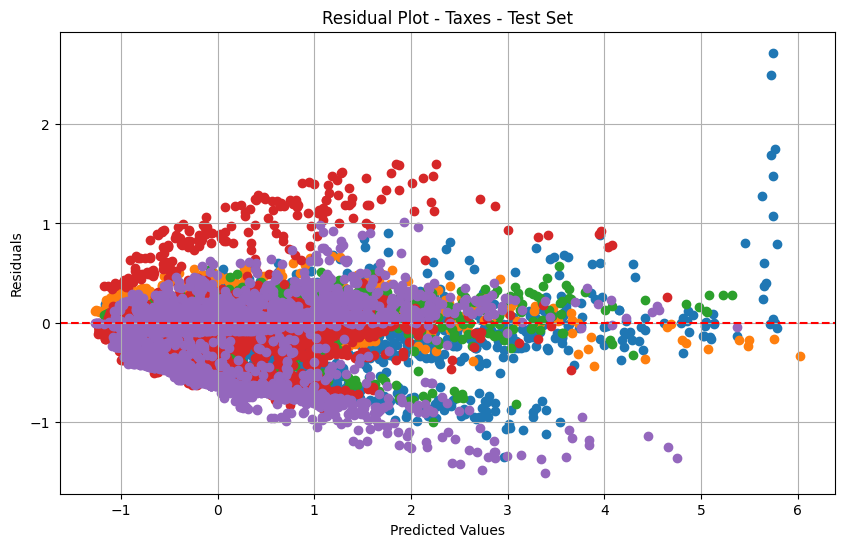

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cross-Validation with Evaluation and Training/Validation Loss Curve
def cross_val_with_evaluation(X_scaled, y_exp_scaled, kf):
    fold = 1

    # To store metrics across all folds
    metrics_summary = {target: {'train': [], 'val': [], 'test': []} for target in target_col_list}

    # Store predictions for plotting residuals later
    all_train_preds = {target: [] for target in target_col_list}
    all_val_preds = {target: [] for target in target_col_list}
    all_test_preds = {target: [] for target in target_col_list}

    # Store actual values for plotting residuals later
    all_train_actuals = {target: [] for target in target_col_list}
    all_val_actuals = {target: [] for target in target_col_list}
    all_test_actuals = {target: [] for target in target_col_list}

    for train_index, val_index in kf.split(X_scaled):
        print(f"Fold {fold}/{kf.get_n_splits()}")
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y_exp_scaled[train_index], y_exp_scaled[val_index]

        # Split validation data further into test and validation
        X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=100)

        # Loop over expense categories
        for i, target in enumerate(target_col_list):
            # Create and fit the Random Forest model
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            model.fit(X_train, y_train[:, i])

            # Predictions
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)
            y_test_pred = model.predict(X_test)

            # Store predictions and actual values for residual plots
            all_train_preds[target].append(y_train_pred)
            all_val_preds[target].append(y_val_pred)
            all_test_preds[target].append(y_test_pred)

            all_train_actuals[target].append(y_train[:, i])
            all_val_actuals[target].append(y_val[:, i])
            all_test_actuals[target].append(y_test[:, i])

            # Metrics calculation
            train_metrics = calculate_metrics(y_train[:, i], y_train_pred)
            val_metrics = calculate_metrics(y_val[:, i], y_val_pred)
            test_metrics = calculate_metrics(y_test[:, i], y_test_pred)

            # Store metrics for this fold
            metrics_summary[target]['train'].append(train_metrics)
            metrics_summary[target]['val'].append(val_metrics)
            metrics_summary[target]['test'].append(test_metrics)

            print(f'Model Results for {target.capitalize()} (Fold {fold}):')
            print('Train Data:', train_metrics)
            print('Validation Data:', val_metrics)
            print('Test Data:', test_metrics)
            print()

        fold += 1

    # Compute and display final average metrics across all folds
    print("Final Average Metrics After Cross-Validation:")
    for target in target_col_list:
        print(f"Results for {target.capitalize()}:")

        avg_train_metrics = average_metrics(metrics_summary[target]['train'])
        avg_val_metrics = average_metrics(metrics_summary[target]['val'])
        avg_test_metrics = average_metrics(metrics_summary[target]['test'])

        print("Average Train Metrics:", avg_train_metrics)
        print("Average Validation Metrics:", avg_val_metrics)
        print("Average Test Metrics:", avg_test_metrics)
        print()

        # Plot residuals for each target
        plot_residuals(all_train_actuals[target], all_train_preds[target], f'{target.capitalize()} - Training Set')
        plot_residuals(all_val_actuals[target], all_val_preds[target], f'{target.capitalize()} - Validation Set')
        plot_residuals(all_test_actuals[target], all_test_preds[target], f'{target.capitalize()} - Test Set')

    return model

def calculate_metrics(y_true, y_pred):
    """Calculate regression metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-Squared': r2, 'MAPE': mape}

def average_metrics(metrics_list):
    """Compute the average of the metrics."""
    df = pd.DataFrame(metrics_list)
    return df.mean().to_dict()

def plot_residuals(actual_values_list, predicted_values_list, title):
    """Plot residuals."""
    plt.figure(figsize=(10, 6))

    for actual_values, predicted_values in zip(actual_values_list, predicted_values_list):
        residuals = actual_values - predicted_values
        plt.scatter(predicted_values, residuals)

    plt.axhline(0, color='red', linestyle='--')  # Line at zero residual
    plt.title(f'Residual Plot - {title}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

# Cross-Validation Execution
kf = KFold(n_splits=5)  # Define your KFold object here
model = cross_val_with_evaluation(X_scaled, y_exp_scaled, kf)


In [ ]:
def get_prediction(model, input_data):
    input_data_val = input_data.values
    input_data_val_scaled = scaler_X.fit_transform(input_data_val)
    input_data_val_scaled = input_data_val_scaled[..., np.newaxis]
    input_data_pred = np.column_stack(model.predict(input_data_val_scaled))
    input_data_pred_original = scaler_y.inverse_transform(input_data_pred)
    return input_data_pred_original

In [ ]:
input_data = pd.DataFrame(
              [[7000,40000, 50, 2, 0, 1]],
              columns=['total', 'median_family_income', 'num_counties_in_st', 'n_children', 'n_parents', 'n_members']
        )

input_data["per_member_cost"] = input_data["total"] / input_data["n_members"]
input_data["child_expense_cost"] = input_data["per_member_cost"]*input_data["n_children"]
input_data["parent_expense_cost"] = input_data["per_member_cost"]*input_data["n_parents"]
input_data["other_expense_cost"] = input_data["total"] - (input_data["child_expense_cost"]+input_data["parent_expense_cost"])